In [7]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [13]:
import os
import copy
import datetime
import warnings

import random
from datetime import datetime
import re

import numpy as np
from scipy.stats import t
import pandas as pd
import keras

from matplotlib import pyplot as plt
import matplotlib as mpl

from wordcloud import WordCloud

import seaborn as sns

ModuleNotFoundError: No module named 'keras'

In [15]:
data=pd.read_csv(r"ml_v1.csv")

In [17]:
data

,lead_id,created_at,advance_emi,assigned_to,c_state,p_state,hospitalObject.type,age,age_group,borrower.gender,...,speciality_id,state,submitted_by,subvention_percentage,subvention_product_id,surgery,surgery_id,turn_around_time.value,type,target
0,5357,05-06-2018,4,3394,Chandigarh,Chandigarh,super,46,4,male,...,58.0,first_contact_state,3393,4.0,16,Medical Treatment,339,47.0,phone,0
1,8744,07-08-2018,3,3394,Delhi,NaN,multi,33,2,male,...,1.0,consent_done,4031,10.0,5,Lower Segment Caesarean Section LSCS,1,17.0,offline_web,0
2,8996,13-08-2018,6,3394,Delhi,NaN,super,34,2,male,...,58.0,NaN,0,5.0,6,Medical Treatment,339,13.0,phone,0
3,9616,28-08-2018,6,3394,Maharashtra,Maharashtra,super,36,3,male,...,1.0,cpv_done,4283,8.5,6,In Vitro Fertilisation IVF,3,0.0,offline,0
4,9690,30-08-2018,3,3394,Chattisgarh,West Bengal,single_ivf,38,3,male,...,1.0,do_issue,4031,6.0,5,In Vitro Fertilisation IVF,3,14.0,whatsapp,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,47804,31-07-2019,8,3394,Punjab,Punjab,single_ivf,28,1,male,...,1.0,utr_awaited,33973,8.5,0,Test Tube Baby,191,0.0,offline,0
1420,47811,31-07-2019,5,3394,Delhi,Delhi,single_ivf,36,3,male,...,1.0,utr_awaited,10515,8.0,0,In Vitro Fertilisation IVF,3,0.0,online,0
1421,48006,31-07-2019,6,3394,Kerala,NaN,multi,32,2,male,...,71.0,utr_awaited,6012,6.0,0,Hair Transplant,346,0.0,offline,0
1422,48047,31-07-2019,2,3394,Uttarakhand,NaN,single_cosmetic,23,0,male,...,71.0,utr_awaited,15034,6.5,0,Hair Transplant,102,0.0,offline,0


In [19]:
data.shape


(1424, 88)

In [17]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 88 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
cheque_bounce,1421,99.8
lead_providers_other,1401,98.4
loan_type_n,1391,97.7
r2_relationship,1367,96.0
r1_relationship,1364,95.8
referrer_name,1362,95.6
borrower.place_of_birth,1339,94.0
lead_origination,1182,83.0
borrower_same_as_patient,1110,77.9
existing_loan_2,1076,75.6


In [21]:
data.drop(['borrower_same_as_patient','created_at','qualified_timestamp','converted_timestamp','disbursed_timestamp','assigned_to','age_group','borrower.type','cheque_bounce', 'r2_relationship', 'r2_relationship','lead_providers_other', 'referrer_name', 'borrower.place_of_birth', 'primary_bank', 'borrower_same_as_patient'], axis = 1, inplace = True)

In [23]:
data.drop(['doc_for_cibil_timestamp','r1_relationship','hospital','hospital_id','speciality_id','state','surgery_id'], axis=1, inplace=True)

In [25]:
data.set_index('lead_id', inplace = True)
print(data.shape)
data.head(4)

(1424, 66)


,advance_emi,c_state,p_state,hospitalObject.type,age,borrower.gender,qualification,borrower.marital_status,birth_place,borrower.work.business_type,...,referrer,sales,speciality,submitted_by,subvention_percentage,subvention_product_id,surgery,turn_around_time.value,type,target
lead_id,,,,,,,,,,,,,,,,,,,,,
5357,4,Chandigarh,Chandigarh,super,46,male,18,married,1,NaN,...,3030,3030.0,Medicine,3393,4.0,16,Medical Treatment,47.0,phone,0
8744,3,Delhi,NaN,multi,33,male,16,married,1,business,...,4,NaN,OBSTETRICS AND GYNAECOLOGY,4031,10.0,5,Lower Segment Caesarean Section LSCS,17.0,offline_web,0
8996,6,Delhi,NaN,super,34,male,16,married,1,NaN,...,4012,4012.0,Medicine,0,5.0,6,Medical Treatment,13.0,phone,0
9616,6,Maharashtra,Maharashtra,super,36,male,12,married,1,NaN,...,4283,4283.0,OBSTETRICS AND GYNAECOLOGY,4283,8.5,6,In Vitro Fertilisation IVF,0.0,offline,0


In [27]:
data.rename({'hospitalObject.type': 'hospital_type', 'borrower.gender': 'gender','borrower.marital_status':'marital_status','borrower.work.business_type':'business_type','borrower.work.company_category':'company_category','borrower.work.current_job_duration':'current_job_duration','borrower.work.designation':'designation','borrower.work.employment_type':'employment_type','borrower.work.gross_salary':'gross_salary','borrower.work.gross_salary2':'gross_salary2','borrower.work.salary':'salary','borrower.work.job_stability':'job_stability'}, axis=1, inplace=True)
data_backup = data.copy()

array([[<Axes: title={'center': 'salary'}>]], dtype=object)

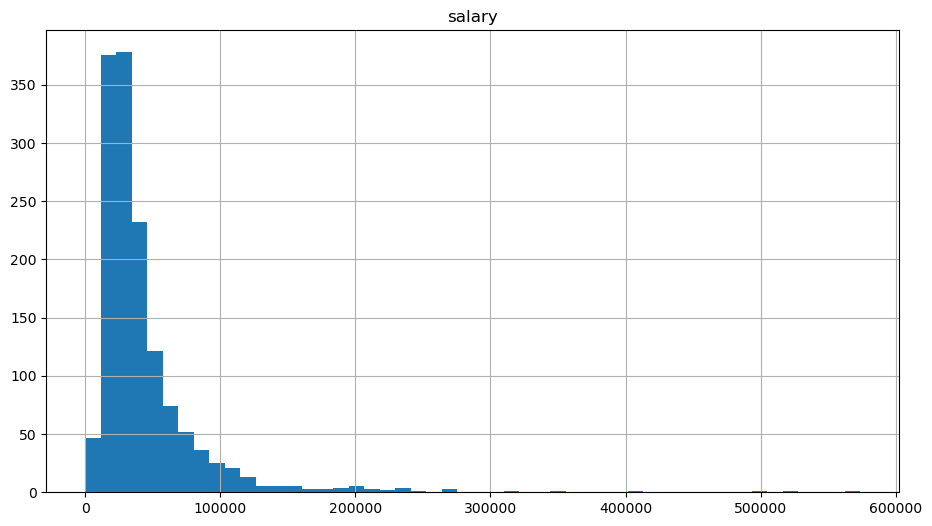

In [29]:
data = data_backup.copy()
data.hist('salary', figsize=(11,6), bins=50)

In [ ]:
lower_limit = data['salary'].quantile(0.01)
upper_limit = data['salary'].quantile(0.99)
median = data.loc[(data['salary'] >lower_limit)|(data['salary'] <upper_limit), 'salary'].median()
print(lower_limit,upper_limit,median)

5794.0586 241896.31000000006 31013.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19a4da240>]],
      dtype=object)

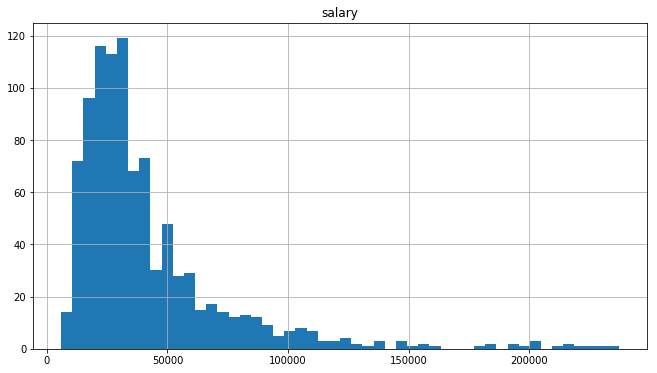

In [ ]:
data['salary'] = np.where((data['salary'] <lower_limit)|(data['salary'] >upper_limit), median,data['salary'])
data.hist('salary', figsize=(11,6), bins=50)

104


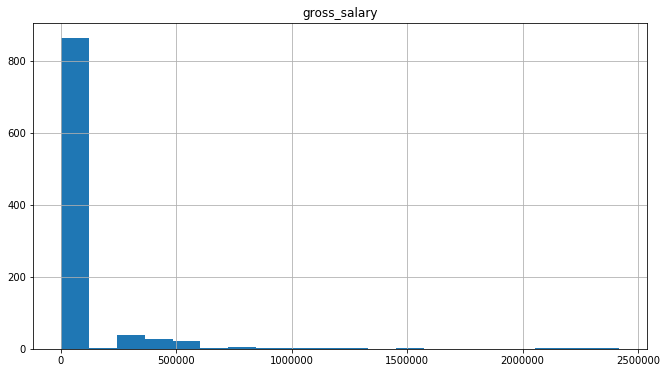

In [ ]:
print((data['gross_salary'] > 0).sum())
data.hist('gross_salary', figsize=(11,6), bins=20)
data.drop(['gross_salary'], axis=1, inplace = True);

15


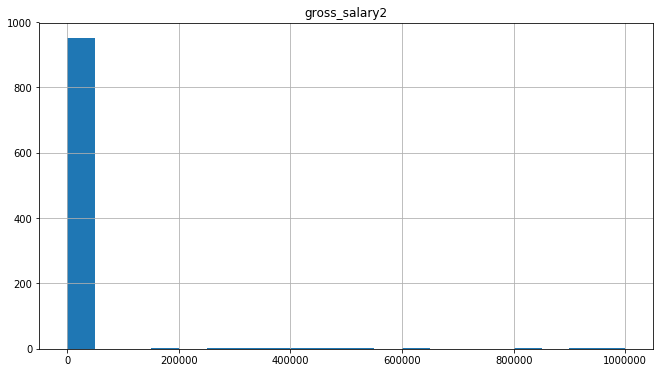

In [ ]:
print((data['gross_salary2'] > 0).sum())
data.hist('gross_salary2', figsize=(11,6), bins=20)
data.drop(['gross_salary2'], axis=1, inplace = True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19a3e3828>]],
      dtype=object)

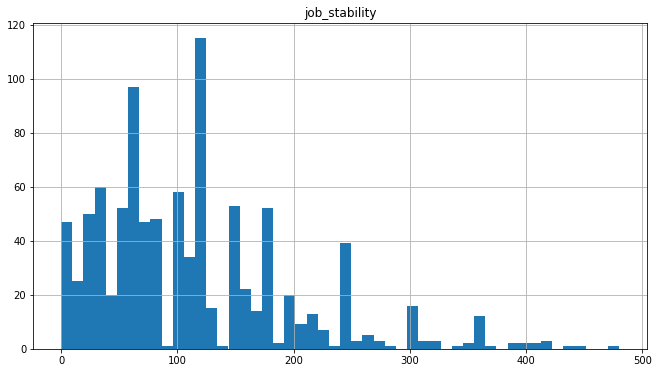

In [ ]:
data.hist('job_stability', figsize=(11,6), bins=50)

In [ ]:
lower_limit = data['job_stability'].quantile(0.01)
upper_limit = data['job_stability'].quantile(0.99)
median = data.loc[(data['job_stability'] >lower_limit)|(data['job_stability'] <upper_limit), 'job_stability'].median()
print(lower_limit,upper_limit,median)

0.0 388.44000000000005 96.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff19cd1cd30>]],
      dtype=object)

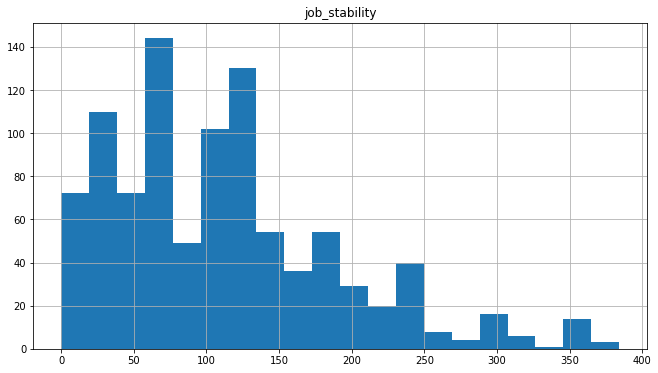

In [ ]:
data['job_stability'] = np.where((data['job_stability'] <lower_limit)|(data['job_stability'] >upper_limit), median,data['job_stability'])
data.hist('job_stability', figsize=(11,6),bins=20)

5


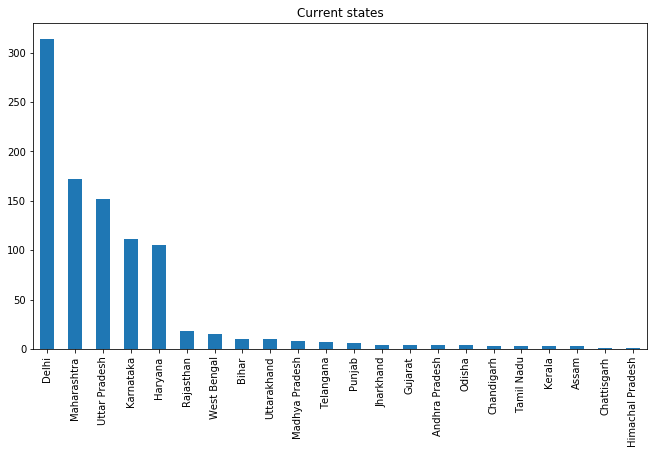

In [ ]:
print((data['c_state'].isnull()).sum())
data['c_state'].value_counts().plot(kind ='bar', figsize=(11,6), title="Current states")

550


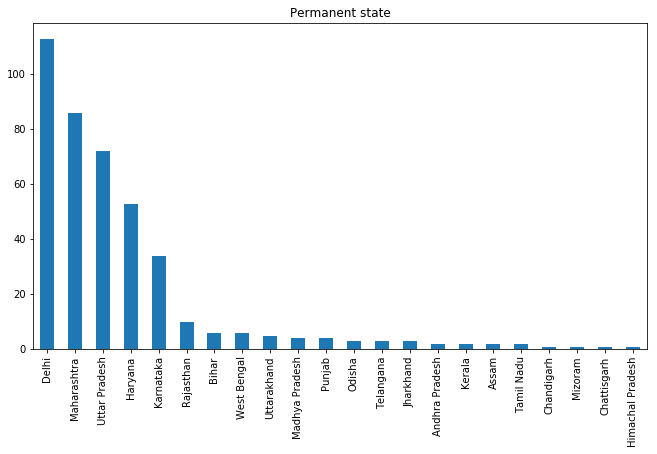

In [ ]:
print((data['p_state'].isnull()).sum())
data['p_state'].value_counts().plot(kind ='bar', figsize=(11,6), title="Permanent state")

0


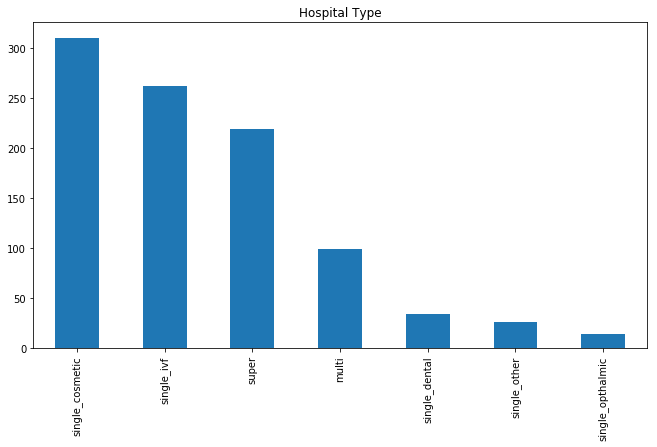

In [ ]:
print((data['hospital_type'].isnull()).sum())
data['hospital_type'].value_counts().plot(kind ='bar', figsize=(11,6), title="Hospital Type")

0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff199f7a7b8>]],
      dtype=object)

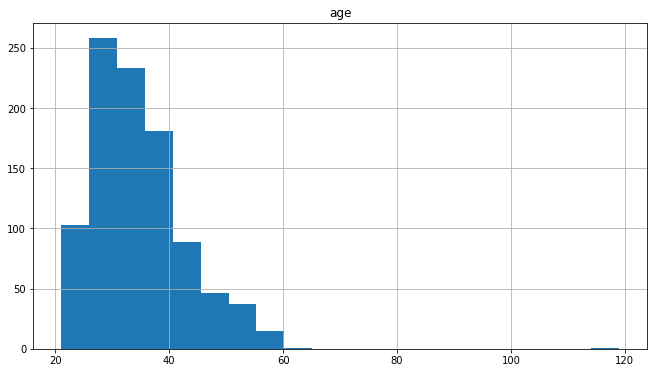

In [ ]:
print((data['age'].isnull()).sum())
data.hist('age', figsize=(11,6), bins=20)

In [ ]:
data[(data['age']<21)|(data['age']>58)]['age']

lead_id
14294    119
21507     59
22875     59
27552     62
29058     59
33387     59
33888     59
Name: age, dtype: int64

33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff199f13cc0>]],
      dtype=object)

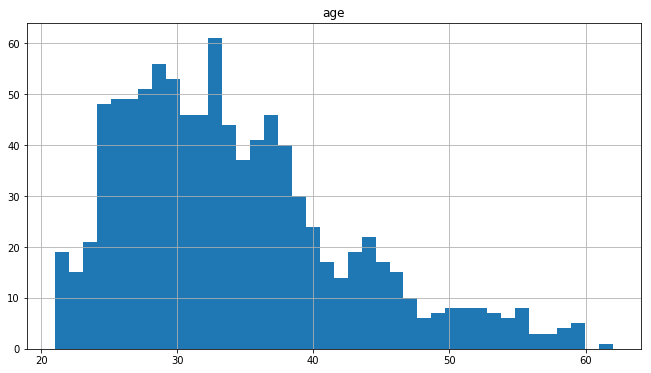

In [ ]:
median = data.loc[(data['age'] >=21)|(data['age'] <=60), 'age'].median()
print(median)
data['age'] = np.where((data['age'] <21)|(data['age'] >65), median,data['age'])
data.hist('age', figsize=(11,6), bins=40)

0


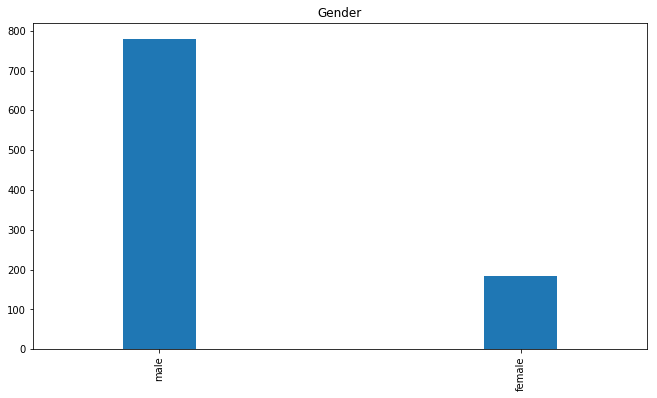

In [ ]:
print((data['gender'].isnull()).sum())
data['gender'].value_counts().plot(kind ='bar', figsize=(11,6), title="Gender", width=0.2)

0


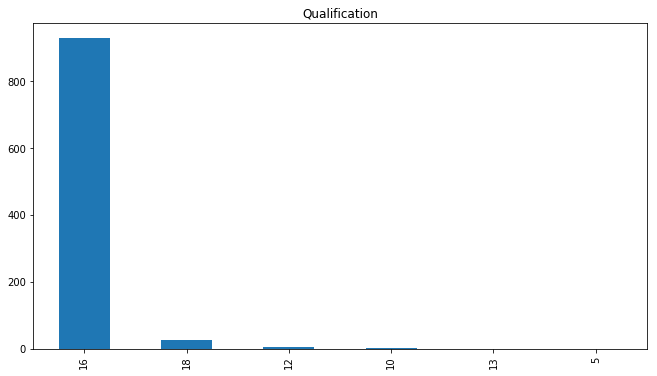

In [ ]:
print((data['qualification'].isnull()).sum())
data['qualification'].value_counts().plot(kind ='bar', figsize=(11,6), title="Qualification")
data.drop(['qualification'], axis=1, inplace= True);


19


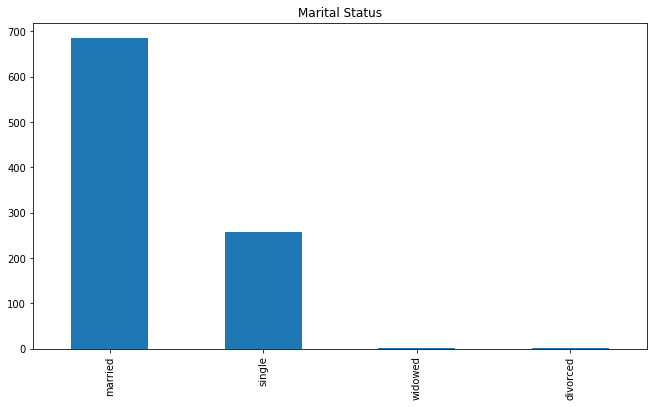

In [ ]:
#birth_place	type	business_type	business_type_n	company_category	cc_n	current_job_duration	cj_n	designation	designation_n	employment_type
print((data['marital_status'].isnull()).sum())
data['marital_status'].value_counts().plot(kind ='bar', figsize=(11,6), title="Marital Status")

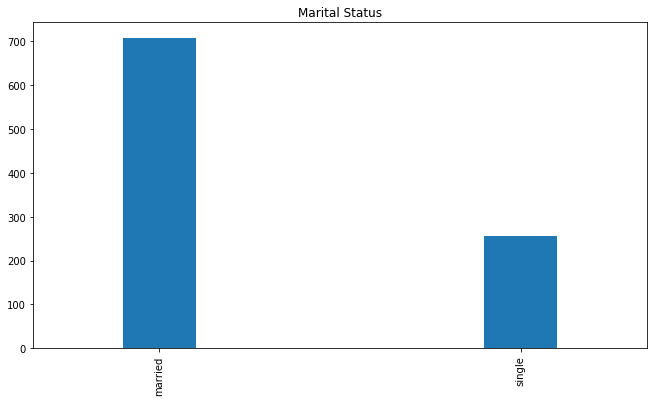

In [ ]:
data['marital_status'] = np.where((data['marital_status'].isin(['widowed','divorced']))|(data['marital_status'].isnull()), 'married',data['marital_status'])
data['marital_status'].value_counts().plot(kind ='bar', figsize=(11,6), title="Marital Status", width=0.2)

0


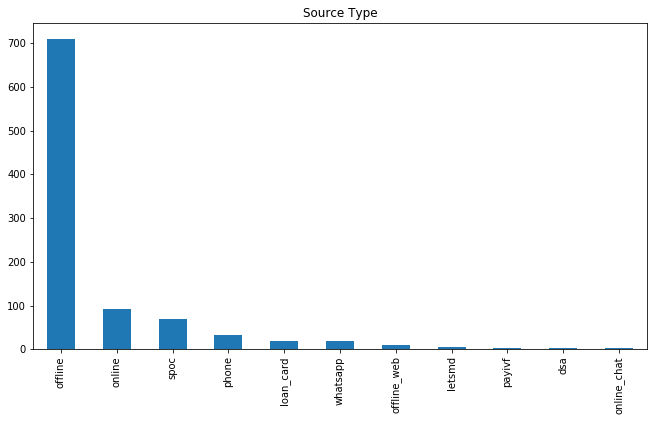

In [ ]:
print((data['type'].isnull()).sum())
data['type'].value_counts().plot(kind ='bar', figsize=(11,6), title="Source Type")

444


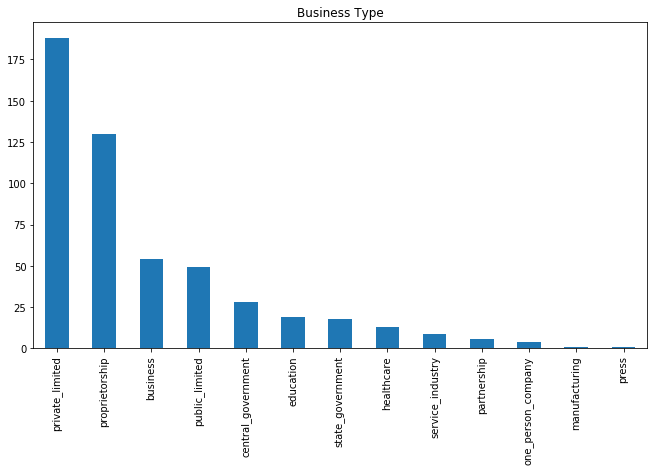

In [ ]:
print((data['business_type'].isnull()).sum())
data['business_type'].value_counts().plot(kind ='bar', figsize=(11,6), title="Business Type")

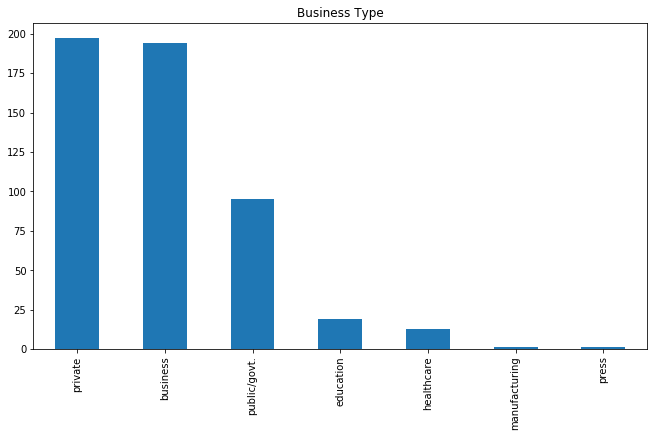

In [ ]:
data['business_type'] = np.where(data['business_type'].isin(['proprietorship','partnership','one_person_company']), 'business',data['business_type'])
data['business_type'] = np.where(data['business_type'].isin(['public_limited','central_government','state_government']), 'public/govt.',data['business_type'])
data['business_type'] = np.where(data['business_type'].isin(['private_limited','service_industry']), 'private',data['business_type'])

data['business_type'].value_counts().plot(kind ='bar', figsize=(11,6), title="Business Type")

In [ ]:
# Find correlations with the target and sort
correlations = data.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 current_job_duration     0.008308
d_s                      0.009303
loan_amount              0.012142
down_payment             0.015060
lead_account             0.015238
existing_emi             0.016896
age                      0.017676
job_stability            0.024646
sales                    0.027987
advance_emi              0.029310
loan_rate                0.030203
foir                     0.032006
loan_tenure              0.039322
subvention_product_id    0.067401
target                   1.000000
Name: target, dtype: float64

Most Negative Correlations:
 cc_n                       -0.143090
dmi_cibil_score            -0.039538
salary                     -0.038544
patient_categories         -0.038508
s_q                        -0.036157
patient_same_as_borrower   -0.025347
subvention_percentage      -0.023419
submitted_by               -0.019453
proposed_emi               -0.013807
q_c                        -0.012459
net_disbursal_amount        0.00

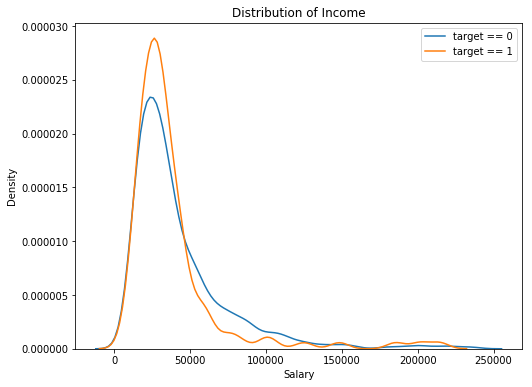

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['target'] == 0, 'salary'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['target'] == 1, 'salary'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Salary'); plt.ylabel('Density'); plt.title('Distribution of Income');

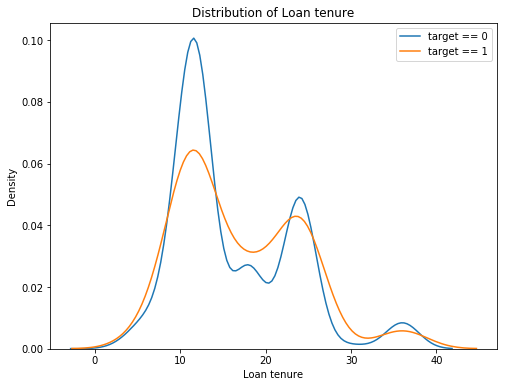

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['target'] == 0, 'loan_tenure'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['target'] == 1, 'loan_tenure'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Loan tenure'); plt.ylabel('Density'); plt.title('Distribution of Loan tenure');

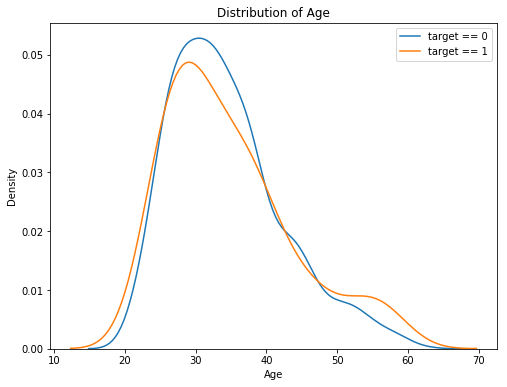

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['target'] == 0, 'age'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['target'] == 1, 'age'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Age');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


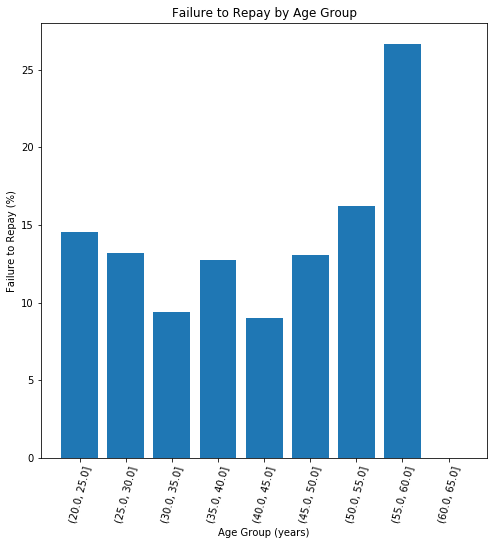

In [ ]:
# Age information into a separate dataframe
age_data = data[['target', 'age']]
age_data['YEARS_BIRTH'] = data['age']

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['target'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

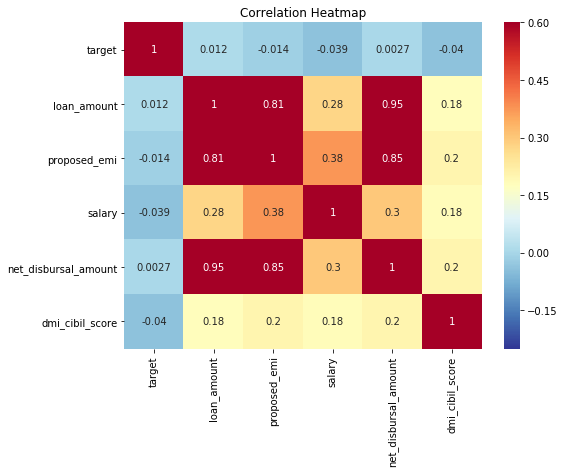

In [ ]:
ext_data = data[['target', 'loan_amount', 'proposed_emi', 'salary', 'net_disbursal_amount','dmi_cibil_score']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: inval

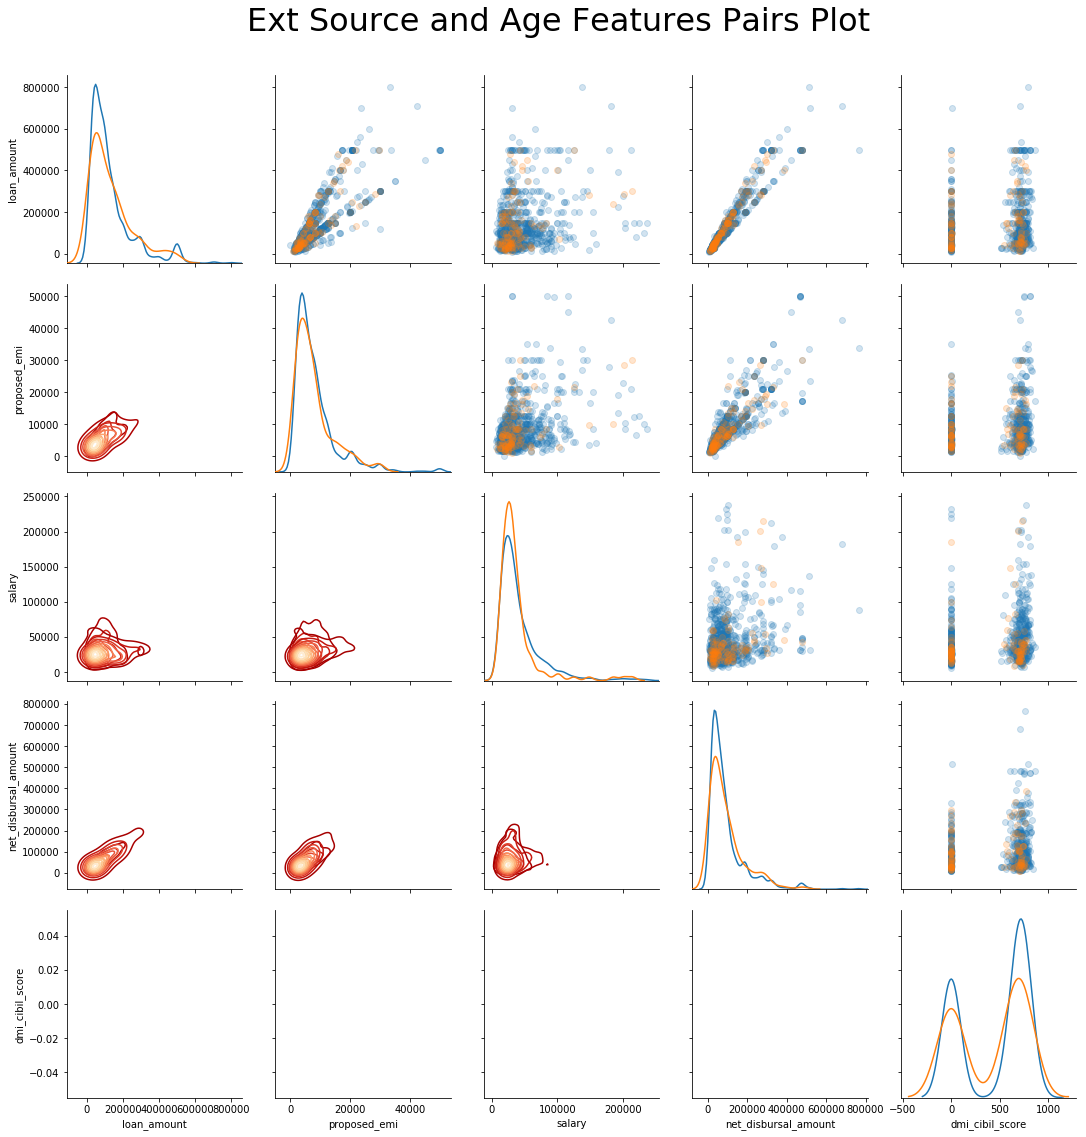

In [ ]:
plot_data = ext_data.copy()

# # Add in the age of the client in years
# plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# # Drop na values and limit to first 100000 rows
# plot_data = plot_data.dropna().loc[:100000, :]

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'target',
                    vars = [x for x in list(plot_data.columns) if x != 'target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

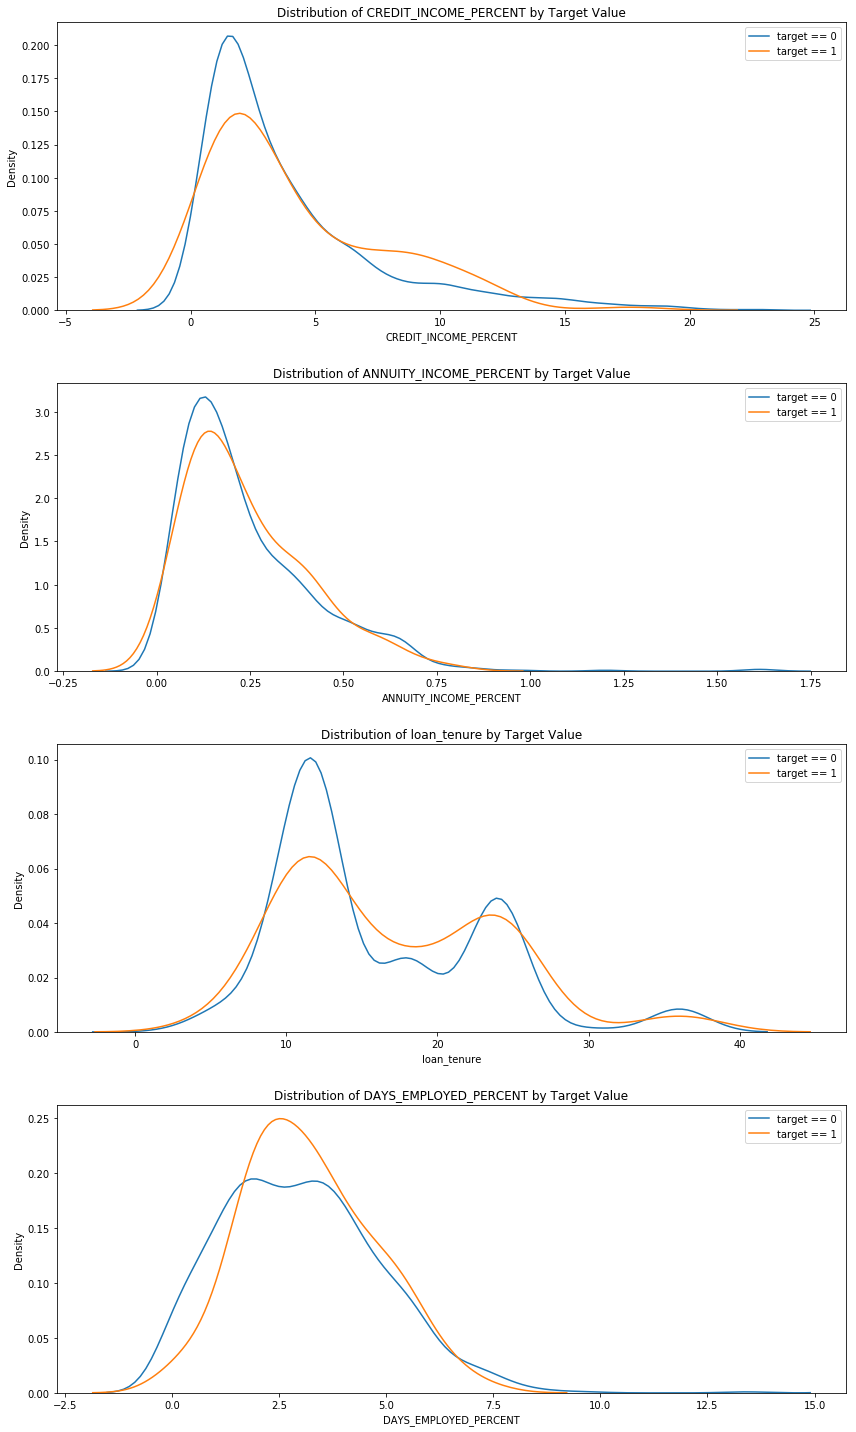

In [ ]:
data_train = data.copy()
data_test = data.copy()
data_train_domain = data_train.copy()
data_test_domain = data_test.copy()

data_train_domain['CREDIT_INCOME_PERCENT'] = data_train_domain['loan_amount'] / data_train_domain['salary']
data_train_domain['ANNUITY_INCOME_PERCENT'] = data_train_domain['proposed_emi'] / data_train_domain['salary']
# data_train_domain['CREDIT_TERM'] = data_train_domain['AMT_ANNUITY'] / data_train_domain['AMT_CREDIT']
data_train_domain['DAYS_EMPLOYED_PERCENT'] = data_train_domain['job_stability'] / data_train_domain['age']

# data_test_domain['CREDIT_INCOME_PERCENT'] = data_test_domain['AMT_CREDIT'] / data_test_domain['AMT_INCOME_TOTAL']
# data_test_domain['ANNUITY_INCOME_PERCENT'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_INCOME_TOTAL']
# data_test_domain['CREDIT_TERM'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_CREDIT']
# data_test_domain['DAYS_EMPLOYED_PERCENT'] = data_test_domain['DAYS_EMPLOYED'] / data_test_domain['DAYS_BIRTH']

plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'loan_tenure', 'DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data_train_domain.loc[data_train_domain['target'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data_train_domain.loc[data_train_domain['target'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

In [ ]:
data_train = data.copy()
data_test = data.copy()
data_train.head()

,advance_emi,c_state,p_state,hospital_type,age,gender,marital_status,business_type,company_category,cc_n,current_job_duration,designation,employment_type,job_stability,salary,borrower_relationship,patient_same_as_borrower,city_wise_leads,q_c,s_q,d_s,dmi_cibil_score,dmi_credit_decision,dmi_reason_for_rejection,down_payment,existing_emi,existing_loan_1,existing_loan_2,foir,hospital_location,lead_account,lead_origination,lead_providers,lender,loan_amount,loan_purpose,loan_rate,loan_tenure,loan_to_be_disbursed,loan_type,mode_of_payment,net_disbursal_amount,patient_categories,processing_fee,proposed_emi,referrer,sales,speciality,submitted_by,subvention_percentage,subvention_product_id,surgery,type,target
lead_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5357,4,Chandigarh,Chandigarh,super,46.0,male,married,NaN,public_limited,NaN,96,NaN,Salaried,252.0,192591.0,Brother,0.0,delhi,0.15,386.80,124.22,788.0,Reject,Days%20Passed%20Due(DPD)%20is%20more%20than%20...,54099.0,0.0,NaN,NaN,0.0,delhi,4103,NaN,NaN,stashFin,392652,medical,8.0,36,hospital,FLDG,ACH,376946.0,0.0,1770.0,13525.00,3030,3030.0,Medicine,3393,4.0,16,Medical Treatment,phone,0
8744,3,Delhi,NaN,multi,33.0,male,married,business,business,0.0,24,NaN,SENP,24.0,10762.0,NaN,1.0,delhi,0.37,54.31,92.36,730.0,Reject,NaN,0.0,0.0,NaN,NaN,0.0,Delhi,4031,day_0_lead,NaN,stashFin,50000,medical,0.0,12,hospital,FLDG,ACH,45000.0,0.0,0.0,4167.00,4,NaN,OBSTETRICS AND GYNAECOLOGY,4031,10.0,5,Lower Segment Caesarean Section LSCS,offline_web,0
8996,6,Delhi,NaN,super,34.0,male,married,NaN,NaN,NaN,0,NaN,SENP,12.0,125000.0,husband,0.0,delhi,27.44,258.64,120.16,654.0,Reject,CIBIL Error,130000.0,0.0,NaN,NaN,0.0,Delhi,4103,NaN,NaN,stashFin,500000,medical,2.0,24,hospital,FLDG,NaN,333200.0,0.0,11800.0,21666.67,4012,4012.0,Medicine,0,5.0,6,Medical Treatment,phone,1
9616,6,Maharashtra,Maharashtra,super,36.0,male,married,NaN,private_limited,NaN,96,superviser,Salaried,120.0,15551.0,Husband,0.5,mumbai,189.78,289.34,602.48,732.0,Reject,Days%20Passed%20Due(DPD)%20is%20more%20than%20...,17500.0,0.0,NaN,NaN,0.0,mumbai,4780,middle_of_ipd,counsellor,stashFin,70000,medical,0.0,24,hospital,FLDG,NACH,44898.0,0.0,1652.0,2917.00,4283,4283.0,OBSTETRICS AND GYNAECOLOGY,4283,8.5,6,In Vitro Fertilisation IVF,offline,0
9690,3,Chattisgarh,West Bengal,single_ivf,38.0,male,married,NaN,private_limited,NaN,120,Senior Engineer,Salaried,144.0,40350.0,Spouse,0.0,delhi,0.46,143.57,142.40,733.0,Reject,NaN,25000.0,0.0,NaN,NaN,0.0,kolkata,4031,NaN,NaN,stashFin,100000,medical,0.0,12,hospital,FLDG,NaN,67820.0,0.0,1180.0,8333.00,5696,5696.0,OBSTETRICS AND GYNAECOLOGY,4031,6.0,5,In Vitro Fertilisation IVF,whatsapp,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data_train:
    if data_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(data_train[col])
            # Transform both training and testing data
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
data_train = data_train[['hospital_type','employment_type','dmi_credit_decision','lender','advance_emi','age','cc_n','current_job_duration','job_stability','salary','patient_same_as_borrower','dmi_cibil_score', 'loan_amount','loan_tenure','loan_rate','proposed_emi']]
data_test = data_train.copy()
train_labels = data[['target']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'target' in data_train:
    train = data_train.drop(columns = ['target'])
else:
    train = data_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = data_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(data_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (964, 12)
Testing data shape:  (964, 12)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = data[['target']]
submit['predicted'] = log_reg_pred

submit.head()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,target,predicted
lead_id,,
5357,0,0.474176
8744,0,0.479963
8996,1,0.478114
9616,0,0.476532
9690,0,0.480178


In [ ]:
submit['target'].corr(submit['predicted'])

0.05179391139902407

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(submit['target'], submit['predicted'])

0.5487738910926795